#Step 1 - Load the data set

* After loading the dataset, we select the 3rd and 4th columns which will be our X1, X2 attributes respectively and the 9th column which provides the output-response y. 





In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd
import numpy as np
results = []
with open('DataSet2.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(';'))
    print(results[0:10])

data = pd.DataFrame(results, columns = list("abcdefghi"))
data = data.drop(['a', 'b'], 1)
data = data.drop(data.index[0])
data = data[['c', 'd', 'i']]
data = data[(data[['c','d','i']] != '?').all(axis=1)]
data



Saving DataSet2.txt to DataSet2 (2).txt
User uploaded file "DataSet2.txt" with length 132960755 bytes
[['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], ['16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', '17.000'], ['16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', '16.000'], ['16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000', '0.000', '1.000', '17.000'], ['16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:31:00', '3.700', '0.520', '235.220', '15.800', '0.000', '1.000

,c,d,i
1,4.216,0.418,17.000
2,5.360,0.436,16.000
3,5.374,0.498,17.000
4,5.388,0.502,17.000
5,3.666,0.528,17.000
6,3.520,0.522,17.000
7,3.702,0.520,17.000
8,3.700,0.520,17.000
9,3.668,0.510,17.000
10,3.662,0.510,16.000


# Some preprocessing

* Here, we assign float values to our dataframe's content and find the minimum and maximum values of each one of the **X1** and **X2** attributes.

In [3]:
L_float = data.as_matrix(columns=None)
#Convert all values to float.
data3D = L_float.astype(np.float)
print(data3D.shape)

#Find min, max values for both attributes.
lim1=data3D[:,0].min()
print(lim1)

lim2=data3D[:,0].max()
print(lim2)

print()

lim3=data3D[:,1].min()
print(lim3)

lim4=data3D[:,1].max()
print(lim4)

(2049280, 3)
0.076
11.122

0.0
1.39





* Next, we generate our new query data set, where the query's attributes **X1** and **X2** are randomly chosen from a **Uniform distribution**, where *X1~U(lim1,lim2)* and *X2~U(lim3,lim4)*. The radius **z** is a relatively small, fixed value.





In [4]:
import random
import numpy as np

#Generate X1,X2 using random uniform distribution and a fixed z.
X1 = np.random.uniform(lim1, lim2, 200)
X2 = np.random.uniform(lim3, lim4, 200)
z1 = 0.05*(lim2 - lim1)
z2 = 0.05*(lim4 - lim3)
z = np.sqrt(z1**2 + z2**2)

print(X1)
print()
print(X2)
print()
print(z)


[ 9.72003482 10.42188456  7.38610738  1.77586716 10.14742623  1.47049799
  9.5583315   1.7513859  10.59984592  4.21286231  1.03420364  1.21399238
  4.68597126  6.68348849  8.07038768  1.82656107  0.55982654  0.46217926
  0.47776361  4.12504229  2.01141126  3.62846433  1.98500114  7.11888908
  8.80766318  3.32959457  1.18306236  8.98981992  5.48860635 10.92089129
  9.79360857  7.12284599  5.7702409   4.63703963  6.12808952  9.71434797
  2.47635422  7.22289158  6.56203444  4.82137142  6.30622007  0.93703642
  8.32173129  4.37962963 10.30681598  1.96602118  1.81146005  5.03199939
  8.42319268  5.77904909  0.46002252 10.47917696  4.0673768   0.87537693
 10.0037467   4.91340069  9.85464701  2.52937504  0.565574    2.06466001
  1.23516712  5.52243857  8.47714753  6.66088068 10.52850902  0.66770266
  1.00337302  2.93283956  6.29126113  3.91670223  6.39186161  4.13500171
  5.16049824  1.37857178  0.10657466  3.53944203  1.7409597   6.82317589
  6.27471737  1.07984686  9.40347913  4.00018541  6

* We **merge** the lists of X1, X2 and z into one array.

In [5]:
X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
QA_dataset = np.empty((len(X1),4))
QA_dataset[:,0] = X1_flattened
QA_dataset[:,1] = X2_flattened
QA_dataset[:,2] = z
QA_dataset[:,3] = 0
print(QA_dataset)


[[9.72003482e+00 3.93599355e-01 5.56655675e-01 0.00000000e+00]
 [1.04218846e+01 3.98857374e-01 5.56655675e-01 0.00000000e+00]
 [7.38610738e+00 1.04123116e+00 5.56655675e-01 0.00000000e+00]
 [1.77586716e+00 5.97123202e-01 5.56655675e-01 0.00000000e+00]
 [1.01474262e+01 5.26417252e-01 5.56655675e-01 0.00000000e+00]
 [1.47049799e+00 4.40323111e-01 5.56655675e-01 0.00000000e+00]
 [9.55833150e+00 6.52858778e-01 5.56655675e-01 0.00000000e+00]
 [1.75138590e+00 6.53794108e-01 5.56655675e-01 0.00000000e+00]
 [1.05998459e+01 2.10844990e-01 5.56655675e-01 0.00000000e+00]
 [4.21286231e+00 3.51044749e-01 5.56655675e-01 0.00000000e+00]
 [1.03420364e+00 5.87926450e-01 5.56655675e-01 0.00000000e+00]
 [1.21399238e+00 1.27757137e+00 5.56655675e-01 0.00000000e+00]
 [4.68597126e+00 1.35798539e-01 5.56655675e-01 0.00000000e+00]
 [6.68348849e+00 2.27805676e-03 5.56655675e-01 0.00000000e+00]
 [8.07038768e+00 9.97283674e-01 5.56655675e-01 0.00000000e+00]
 [1.82656107e+00 1.14068539e+00 5.56655675e-01 0.000000

# Step 2 - Training the Model

* Here we calculate the true answers of QA_dataset array, based on the downloaded dataset data3D.
For this purpose, we use the *calculate_y()* function.

In [10]:
def calculate_y(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[2])
        iter+=1
    #If there is no data point assigned to our query, increase (double) the radius. 
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[2])
          iter+=1  
    #If, still there is no data point assigned to our query, increase (double) the radius.
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[2])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
#Run the algorithm.      
x_list = calculate_y(QA_dataset, data3D)
#print(x_list)
#In case there is a query that did not match to any datapoint from data3D, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[15.625      15.08333333 15.5125     14.68291014 15.85       14.21574741
 16.19354839 14.56961943 14.7        14.7536604   6.02376044  0.92607004
 14.47330334 15.47574222 16.14516129  7.48561151  0.93345297  0.51997498
  0.60127294 14.76871622 11.97363564 14.56663252 14.50943289 15.99453552
 16.625      14.69105691  4.50262697 16.42424242 15.09353173 16.25
 16.         15.79452888 15.48038165 14.43639714 15.48988805 16.
 13.58820159 15.78117048 15.39573901 15.40808824 15.33828208  4.71311288
 16.59869848 14.71107167 16.         14.64651893 13.34773065 14.46780695
 16.22222222 15.40896159  0.54054054 16.33333333 14.30434783  2.01924199
 15.26086957 15.54285714 15.40625    13.61254817  0.67772354 14.29097898
 12.65771916 15.13359546 16.52161383 15.43693833 14.14285714  0.61123495
  9.18937865 13.36308268 14.91538462 14.39149181 15.21691678 14.66666667
 14.84189805 13.82741375  0.39433033 14.52318769 14.97921661 15.49844652
 15.5520667   3.18103448 15.63157895 14.84782609 15.51151813 16.


* We **merge** the true answers **y** with the **X1**, **X2** and **z** attributes of the QA_dataset, into a new matrix of 4 columns with attributes X1, X2, z, y in incremental order.

In [9]:
QA_dataset[:,3] = real_y
print(QA_dataset)



ValueError: ignored

* Here we apply **Principal Component Analysis** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

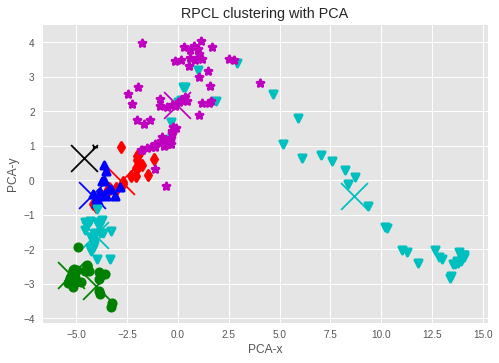

		 Cluster 1 has: 14 data points
		 Cluster 2 has: 42 data points
		 Cluster 3 has: 24 data points
		 Cluster 4 has: 16 data points
		 Cluster 5 has: 1 data points
		 Cluster 6 has: 65 data points
		 Cluster 7 has: 15 data points
		 Cluster 8 has: 23 data points


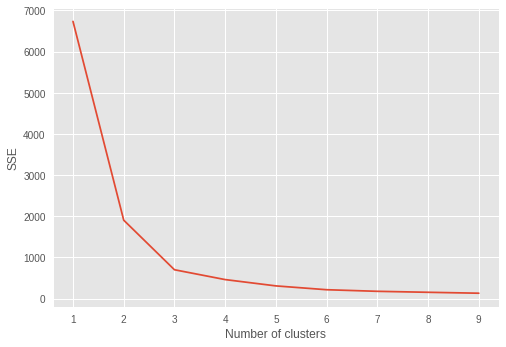

In [35]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(QA_dataset)
#print(sklearn_pca_x)


markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a given list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it. The decision is subjective.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.               
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(sklearn_pca_x)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with PCA')
plt.xlabel('PCA-x')
plt.ylabel('PCA-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))


#Here we plot the Sum of distances of each cluster's datapoints from their respective centroid.
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sklearn_pca_x)
    labels1 = kmeans.labels_
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center.
    
#The plot showcases the error with respect to the number of clusters for K-Means algorithm.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("")
plt.show()

* We also apply **t-SNE** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

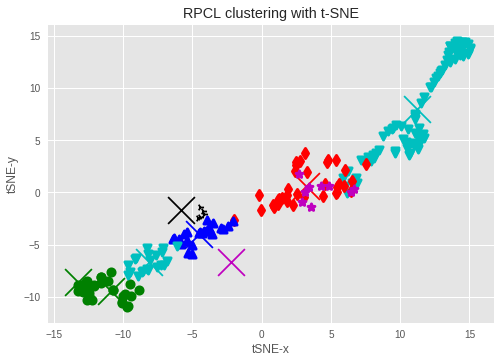

		 Cluster 1 has: 22 data points
		 Cluster 2 has: 75 data points
		 Cluster 3 has: 35 data points
		 Cluster 4 has: 24 data points
		 Cluster 5 has: 5 data points
		 Cluster 6 has: 9 data points
		 Cluster 7 has: 9 data points
		 Cluster 8 has: 21 data points


In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(QA_dataset)

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>= 10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it. The decision is subjective.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(x_test_2d)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with t-SNE')
plt.xlabel('tSNE-x')
plt.ylabel('tSNE-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))


# Step 3 - Predicting the Answer

* First, we generate a small set of **100 queries** with 3 attributes: X1, X2 and z using the **Uniform distribution**.

In [7]:
import random
import numpy as np

#Generate 100 queries q=[X1,X2,z] with X1,X2 following the Uniform distribution and z fixed.
X1 = np.random.uniform(lim1, lim2, 20)
X2 = np.random.uniform(lim3, lim4, 20)
z1 = 0.05*(lim2 - lim1)
z2 = 0.05*(lim4 - lim3)
z = np.sqrt(z1**2 + z2**2)


X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
query = np.empty((len(X1),3))
query[:,0] = X1_flattened
query[:,1] = X2_flattened
query[:,2] = z


print(query)

[[1.32790019e+00 2.67747109e-01 5.56655675e-01]
 [4.02454660e+00 1.13928674e-01 5.56655675e-01]
 [1.63867842e+00 6.07983212e-01 5.56655675e-01]
 [9.78983672e+00 2.29224843e-01 5.56655675e-01]
 [3.10287625e+00 8.59451624e-01 5.56655675e-01]
 [2.21863252e+00 2.20341038e-01 5.56655675e-01]
 [5.57820377e+00 1.17209768e+00 5.56655675e-01]
 [1.05621117e+01 2.61855145e-01 5.56655675e-01]
 [9.15812285e+00 1.23797240e+00 5.56655675e-01]
 [6.59594176e-01 8.29457231e-01 5.56655675e-01]
 [5.16240597e+00 5.58199151e-01 5.56655675e-01]
 [5.08324002e+00 1.08749632e+00 5.56655675e-01]
 [4.35762252e-01 6.02539618e-01 5.56655675e-01]
 [6.35229535e+00 5.76525671e-04 5.56655675e-01]
 [3.51249123e+00 2.44039757e-01 5.56655675e-01]
 [4.98967371e+00 1.27410500e+00 5.56655675e-01]
 [2.89128581e+00 3.61804912e-01 5.56655675e-01]
 [6.14654868e+00 3.70245940e-01 5.56655675e-01]
 [6.60821942e+00 9.43906112e-01 5.56655675e-01]
 [5.05725040e+00 4.42502361e-01 5.56655675e-01]]


* Same as in the Training phase of our model, here we **calculate** the true answers to our 20 new queries, based on the QA_dataset which we generated based on the downloaded data set.
For this purpose, we use the *calculate_y()* function.

In [8]:
def calculate_y_new(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[3])
        iter+=1
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[3])
          iter+=1  
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[3])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
      
#Run the algorithm.      
x_list = calculate_y_new(query, QA_dataset)
#print(x_list)
#In case there is a query that did not match to any datapoint from QA_dataset, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


* For the final part of the prediction phase, we use the *fit()* function to cluster the QA_dataset and we **predict** the answer-response for each query from the 100 queries, which we generated for evaluation, by classifying them to the clusters they belong to and assigning the cluster's centroid response, to the query's predicted response.


In [55]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a given list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=5):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it. The decision is subjective.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    
clf = K_Means()
clf.fit(QA_dataset)

#In pred_y list we store all the predicted answers y for every query, generated for validation.
pred_y = []
for query_data in query:
  print('Query: {number}'.format(number=query_data))
  #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
  #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
  distances = [np.linalg.norm(query_data[0:1] - clf.centroids[centroid][0:1]) for centroid in clf.centroids]
  prediction = distances.index(min(distances))
  print('Predicted Cluster: {number}'.format(number=prediction))
  s = clf.centroids[prediction]
  predicted_y = s[3]
  pred_y.append(predicted_y)
  print('---------------------------')
print('List of all the predicted answers y: {number}'.format(number=pred_y))




Query: [7.22941758 1.22193924 0.55665567]
Predicted Cluster: 3
---------------------------
Query: [9.89003607 1.18199576 0.55665567]
Predicted Cluster: 0
---------------------------
Query: [6.88443472 0.4731613  0.55665567]
Predicted Cluster: 3
---------------------------
Query: [10.42299365  0.36749949  0.55665567]
Predicted Cluster: 0
---------------------------
Query: [3.83192051 1.11564747 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [8.91355032 0.48056157 0.55665567]
Predicted Cluster: 0
---------------------------
Query: [10.83832341  1.34509102  0.55665567]
Predicted Cluster: 0
---------------------------
Query: [4.53464407 0.74113877 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [7.56883474 0.38451333 0.55665567]
Predicted Cluster: 3
---------------------------
Query: [5.19581457 0.63957849 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [2.35630132 1.25434376 0.55665567]
Predicted Cluster: 1
---------------------

# Step 4 - Evaluating the results

* Here, we calulate the **Average Means Squared Error** (RMSE) between the true answer y and the predicted answer y' for our generated queries.

In [56]:
error = np.sum((pred_y - real_y)**2)
average_means_squared_error = np.sqrt(error)/(len(real_y))
print('RMSE = {number}'.format(number=average_means_squared_error))

RMSE = 0.5944371291574778


* The **Normalised Average Means Squared Error** (NRMSE) between the true answer y and the predicted answer y' for our generated queries is calculated below.

In [57]:
average_y = np.average(real_y, axis=0)

enumerator = (pred_y - real_y)**2
denominator = (real_y - average_y)**2
normalised_average_means_squared_error = np.sum(np.sqrt(enumerator / denominator)) / len(real_y)

print('NRMSE = {number}'.format(number=normalised_average_means_squared_error))

NRMSE = 2.0107668543864152


In [69]:
error = np.sum(np.abs(pred_y - real_y))
mean_absolute_error = error/(len(real_y))
print('MAE = {number}'.format(number=mean_absolute_error))

MAE = 1.274541460151481


* We calculate the **Average Means Squared Error** (RMSE) for different k values, for* k=3,4,...,16* and plot the graph.

In [1]:
#We change the RPCL algorithm, to iterate over various k values.
def fit_new(k,data):
        #Create empty dictionary
        centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(k):
            centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        classifications= {}
            
        #Create a list
        for i in range(k):
            classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            centroids[classification] = centroids[classification] + 0.1 * (featureset - centroids[classification])
            centroids[second_winner_centroid] = centroids[second_winner_centroid] - 0.025 * (featureset - centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in classifications:
                if (len(classifications[classification])>19):
                  centroids[classification] = np.average(classifications[classification], axis=0)
            #This will be returned from the algorithm, to be used in the calculations.
            return centroids
          
complexity = list()    
temp = list()       
for k in range(3,16):
  clf = fit_new(k, QA_dataset)
  pred_y = []
  for query_data in query:
    #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
    #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
    distances = [np.linalg.norm(query_data[0:1] - clf[centroid][0:1]) for centroid in clf]
    prediction = distances.index(min(distances))
    s = clf[prediction]
    predicted_y = s[3]
    pred_y.append(predicted_y)
    
  error = np.sum((pred_y - real_y)**2)
  average_means_squared_error = np.sqrt(error)/(len(real_y))
  temp.append(average_means_squared_error)
  complexity.append(k)
  print('For K = {clusters} the Predictive Error is {number}'.format(clusters=k, number=average_means_squared_error))

plt.figure()
plt.plot(complexity, temp)
plt.xlabel("Model Complexity (number of clusters)")
plt.ylabel("Predictive Error (RMSE)")
plt.title("Predicitve Error - Complexity Curve")
plt.show()

NameError: ignored

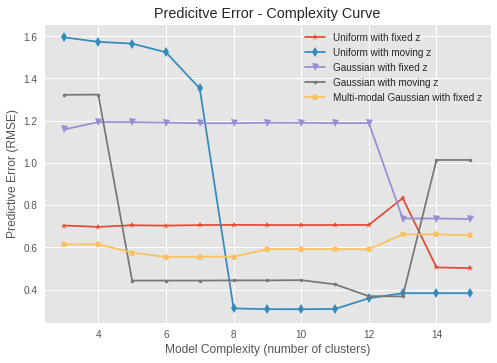

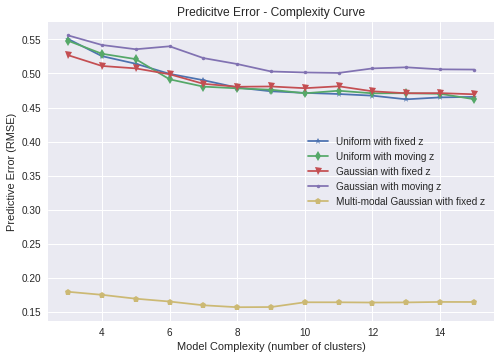